# Anwendung von maschinellem Lernen auf den KHK_Klassifikation.csv Datensatz

## Praktische Demonstration für verschiedene machine Learning Modelle

### Tim Bleicher, Linus Pfeifer

Dieses Jupyter Notebook demonstriert die Anwendung von verschiedenen Machine Learning Modellen auf den KHK_Klassifikation.csv Datensatz. 

**Inhaltsverzeichnis:**
TODO

## 1. Einbindung der Daten

Zu beginn des Projekts werden die Daten zunächst geladen um diese im anschluss analysieren und nutzen zu können.

In [ ]:
pip install -r requirements.txt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('KHK_Klassifikation.csv', sep=',')

In [3]:
print(data.head())

   Alter Geschlecht  Blutdruck  Chol  Blutzucker     EKG  HFmax AP   RZ  KHK
0     40          M        140   289           0  Normal    172  N  0.0    0
1     49          F        160   180           0  Normal    156  N  1.0    1
2     37          M        130   283           0      ST     98  N  0.0    0
3     48          F        138   214           0  Normal    108  Y  1.5    1
4     54          M        150   195           0  Normal    122  N  0.0    0


## 1.1 explorative Analyse der Daten 
TODO

## 2. PCA-Dimensionsreduzierung zur Visualisierung und Analyse der Daten 

### Funktionsweise von PCA
Die Hauptkomponentenanalyse (PCA) dient der Dimensionsreduktion eines Datensatzes. Dies ermöglicht beispielsweise verschiedene Analyse des gesamten Datensatzes (mit mehr als 3 Dimensionen), wobei die Ergebnisse durch die Dimensionsreduktion weiterhin visualisiert werden können.
Das Verfahren der PCA läuft nach folgendem Schema ab:

1. Berechnung des Mittelwerts und Zentrierung der Daten
2. Berechnung der Kovarianzmatrix
3. Berechnung der Eigenwerte und Eigenvektoren
4. Transformation der Daten

Damit die PCA korrekt funktioniert, muss zunächst von jeder Dimension der Mittelwert subtrahiert werden. Dieser Mittelwert entspricht dem Durchschnittswert jeder Dimension. Beispielsweise wird von allen $x$-Werten der Mittelwert $\overline{x}$ subtrahiert. Entsprechendes gilt für die anderen Dimensionen der Daten. Dadurch entsteht ein Datensatz mit einem Mittelwert von null.

Im nächsten Schritt wird die Kovarianzmatrix berechnet, welche die wechselseitigen Zusammenhänge zwischen den Merkmalen quantifiziert. Falls zwei Merkmale stark korrelieren, können diese in einer neuen Achse kombiniert werden.

Anschließend werden die Eigenwerte und Eigenvektoren der Kovarianzmatrix bestimmt. Die Eigenvektoren definieren die Richtungen der Hauptkomponenten, während die zugehörigen Eigenwerte die Bedeutung bzw. die Varianz der jeweiligen Eigenvektoren widerspiegeln.

Es folgt die eigentliche Dimensionsreduktion, indem nur diejenigen Eigenvektoren mit den größten Eigenwerten ausgewählt werden. Diese Eigenvektoren entsprechen den neuen Hauptachsen des Datensatzes.

Schließlich werden die Daten transformiert, indem die ursprüngliche Datenmatrix mit der Matrix der Eigenvektoren multipliziert wird. In dieser Matrix repräsentiert jede Spalte einen Eigenvektor.



In [5]:
label_encoder = LabelEncoder()
categorical_columns = ['Geschlecht', 'EKG', 'AP']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

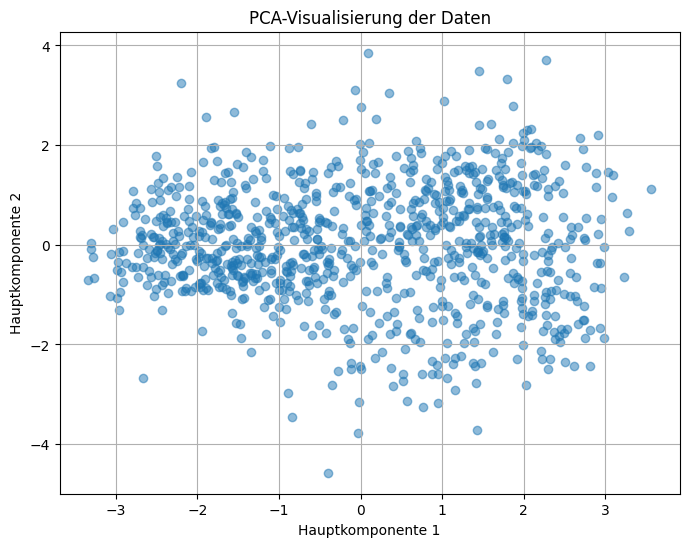

In [9]:
# Skalierung der Daten
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA-Transformation mit zwei Hauptkomponenten
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.title('PCA-Visualisierung der Daten')
plt.grid(True)
plt.show()